<h1 align = 'center'>IRIS FLOWERS DATASET PROJECT</h1>

<h1>Description</h1>
<p>In this project, we will use Python to import and classify the Iris flowers dataset using different algorithms for classification within the sci-kit learn library. You will display the outputs of each algorithm and compare the accuracy of the models we will create. The project aims to test and strengthen our understanding of the following previously discussed topics:</p>
<ul>
    <li>Logistic Regression Model.</li>
    <li>KNN Classification.</li>
    <li>Support Vector Machines.</li>
    <li>Decision Trees Classification.</li>
    <li>Random Forest Classification.</li>
    <li>Naive Bayes Classification.</li>
</ul>
<p>The Dataset used in this project is the Iris plants classification data set that contains three classes with 50 instances each.</p>

<h1>Import Librairies</h1>

In [141]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sb

#data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

#data selection
from sklearn.model_selection import train_test_split, GridSearchCV

#data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import MultinomialNB, GaussianNB

#data performance
from sklearn.metrics import confusion_matrix, accuracy_score

<h1>Data import</h1>

<h2>Reading iris data</h2>

In [142]:
#iris data url
iris_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

#read iris flowers data
iris = pd.read_csv(iris_url)

#add column names to the data
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris.columns = column_names

#iris data overview
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


<h2>Check for missing values</h2

In [143]:
iris.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

<h1>Split Data</h1>
<hp>Create a validation dataset by splitting the loaded data into the following:</p>
<ul>
<li>80% training data for preparing the models (X_train and Y_train)</li>
<li>20% as validation held back data from the models (X_test and Y_test)</li>
</ul>
<p>The number of x_columns for this problem is four as we have four different features in our data. Set the random_state to 7.</p>

In [144]:
#separate the target
y = iris['class']

#collect all features
X = iris.drop(['class'], axis = 1)

#Spliting data using train test split module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

<h1>Build and Train Models</h1>
<p>Import needed libraries and create SIX different models as follows:</p>
<ul>
    <li>Multi_class Logistic Regression model
        <ul>
            <li>LogisticRegression(solver='liblinear', multi_class='ovr')</li>
        </ul>
    </li>    
    <li>K Neighbors Classifier model.</li>
    <li>Decision Tree Classifier.</li>
    <li>Random Forest Classifier.</li>
    <li>Support Vector Machines.</li>
    <li>Gaussian Naive Bayes Classifier.</li>
</ul>
<p>Place the models in a list. Iterate over the array of created models and train them using the training data split in previous step.</p>

<h2>Inserting each Model in a List</h2>

In [145]:
#initialize the list of models
models = []

#logistic regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr')
models.append(('Logistic Regression', log_reg))

#k neighbors classifier model
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
models.append(('k-Neighbors', knn))

#decision tree classifier model
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2)
models.append(('Decision Tree', dec_tree))

#random forest classifier model
rand_forest =RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5)
models.append(('Random Forest', rand_forest))

#support vector machines model
supp_vect = SVC(C=1.0, kernel='rbf', gamma='scale')
models.append(('Support Vector Machines', supp_vect))

#gaussian naive bayes classifer model
gauss = GaussianNB(var_smoothing=1e-9)
models.append(('Gaussian Naive Bayes', gauss))

<h2>Train each model and compare confusion matrix</h2>

In [146]:
#initialize accuracy score
accuracy = []
names = []

#Loop over models
for name, model in models:

    #fit the model
    model.fit(X_train, y_train)

    #predict output
    y_pred = model.predict(X_test)

    #evaluate the model performance using confusion matrix
    conf = np.array(confusion_matrix(y_test, y_pred))

    #model performance using accuracy
    accuracy.append((np.trace(conf)/np.sum(conf))*100)
    

    #print confusion matrix
    print(f'\n{name}:')
    print(f'  accuracy = {accuracy[-1]:.2f}')
    conf_frame = pd.DataFrame(conf, index = ['is_sentosa', 'is_versicolor', 'is_virginica'], columns = ['predicted_sentosa', 'predicted_versicolor', 'predicted_virginica'])
    print(conf_frame)

    

    #collect model name in list
    names.append(name)

e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression:
  accuracy = 90.00
               predicted_sentosa  predicted_versicolor  predicted_virginica
is_sentosa                     7                     0                    0
is_versicolor                  0                     9                    3
is_virginica                   0                     0                   11

k-Neighbors:
  accuracy = 96.67
               predicted_sentosa  predicted_versicolor  predicted_virginica
is_sentosa                     7                     0                    0
is_versicolor                  0                    11                    1
is_virginica                   0                     0                   11

Decision Tree:
  accuracy = 96.67
               predicted_sentosa  predicted_versicolor  predicted_virginica
is_sentosa                     7                     0                    0
is_versicolor                  0                    11                    1
is_virginica                   0                     0 

<h1>Compare Accuracy and Plot</h1> 

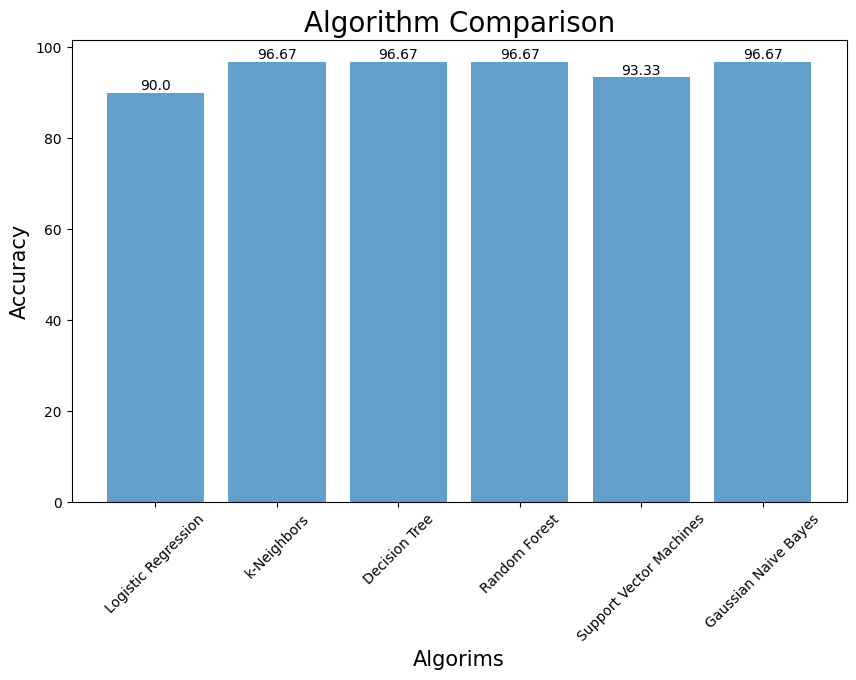

In [147]:
# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(names, accuracy, alpha = 0.7)

# Add title and labels
plt.title('Algorithm Comparison',  fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Algorims',  fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

# Add the values on top of each bar
for bar in bars:
    yval = (bar.get_height())  # Get the height of the bar (the value)
    yval = yval.round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval,  # x, y position
             f'{yval}', ha='center', va='bottom', fontsize=10)  # Display the value
    
# Display the plot
plt.show()

<p>For Iris flowers classification, We can conclude that:</p>
<ul>
    <li>K-Neighbors, Decision Tree and Gaussion Naive Bayes models give the highest performance of 96.67%.</li>
    <li>It is possible to improve each model performance by fine tuning their parameters, normalizing the data, selecting the right features for prediction.</li>
</ul>